<a href="https://colab.research.google.com/github/Skula33/FDSfE_SKulakowski/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intallation Commands:

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Packages:

In [ ]:
import os
import json
import pandas as pd

import numpy as np
import pylab as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words

from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Linking to Google Drive:

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


## Getting Access to Kaggle API: 

In [ ]:
env = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = env["username"]
os.environ["KAGGLE_KEY"] = env["key"]

In [ ]:
!kaggle datasets sentiment

usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: argument command: invalid choice: 'sentiment' (choose from 'list', 'files', 'download', 'create', 'version', 'init', 'metadata', 'status')


In [ ]:
!mkdir sentimentanalysis

mkdir: cannot create directory ‘sentimentanalysis’: File exists


In [ ]:
cd sentimentanalysis/

/content/drive/MyDrive/sentimentanalysis


In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

sentiment-analysis-on-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls *

sampleSubmission.csv			 test.tsv.zip
sentiment-analysis-on-movie-reviews.zip  train.tsv.zip


In [ ]:
!unzip sentiment-analysis-on-movie-reviews.zip

Archive:  sentiment-analysis-on-movie-reviews.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sampleSubmission.csv    
  inflating: test.tsv.zip            
  inflating: train.tsv.zip           


## Reading in our Data:

In [ ]:
reviews = pd.read_csv('train.tsv.zip', delimiter = '\t')

In [ ]:
reviews

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
reviews = reviews.groupby('SentenceId').first()

In [ ]:
reviews

,PhraseId,Phrase,Sentiment
SentenceId,,,
1,1,A series of escapades demonstrating the adage ...,1
2,64,"This quiet , introspective and entertaining in...",4
3,82,"Even fans of Ismail Merchant 's work , I suspe...",1
4,117,A positively thrilling combination of ethnogra...,3
5,157,Aggressive self-glorification and a manipulati...,1
...,...,...,...
8540,155985,... either you 're willing to go with this cla...,2
8541,155998,"Despite these annoyances , the capable Claybur...",2
8542,156022,-LRB- Tries -RRB- to parody a genre that 's al...,1


In [ ]:
reviews.shape

(8529, 3)

In [ ]:
reviews

,PhraseId,Phrase,Sentiment
SentenceId,,,
1,1,A series of escapades demonstrating the adage ...,1
2,64,"This quiet , introspective and entertaining in...",4
3,82,"Even fans of Ismail Merchant 's work , I suspe...",1
4,117,A positively thrilling combination of ethnogra...,3
5,157,Aggressive self-glorification and a manipulati...,1
...,...,...,...
8540,155985,... either you 're willing to go with this cla...,2
8541,155998,"Despite these annoyances , the capable Claybur...",2
8542,156022,-LRB- Tries -RRB- to parody a genre that 's al...,1


In [ ]:
reviews[["Phrase", "Sentiment"]].values

array([['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
        1],
       ['This quiet , introspective and entertaining independent is worth seeking .',
        4],
       ["Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
        1],
       ...,
       ["-LRB- Tries -RRB- to parody a genre that 's already a joke in the United States .",
        1],
       ["The movie 's downfall is to substitute plot for personality .",
        1],
       ["The film is darkly atmospheric , with Herrmann quietly suggesting the sadness and obsession beneath Hearst 's forced avuncular chortles .",
        2]], dtype=object)

In [ ]:
print('Number of Reviews/Documents: {}'.format(len(reviews)))

print('Corpus Size (words): {}'.format(np.sum([len(phrase.split()) for phrase in reviews['Phrase'].values])))

Number of Reviews/Documents: 8529
Corpus Size (words): 162044


In [ ]:
reviews.Sentiment.unique()

array([1, 4, 3, 2, 0])

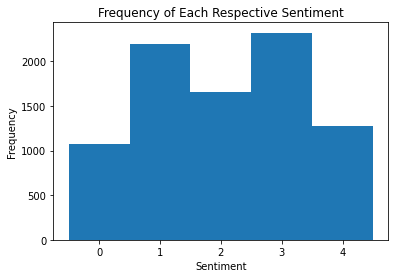

In [ ]:
plt.hist(reviews['Sentiment'], bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]);
plt.title('Frequency of Each Respective Sentiment');
plt.xlabel('Sentiment');
plt.ylabel('Frequency');

### Figure 1: Histogram of Sentiments 

We can see here that sentiments 1 and 3 dominate the frequency of the datatset with over 2000 observations in each section. Sentiments 0 and 4 seem to have lesser representation. With this we can see an increase and decrease over sentiment.

In [ ]:
!python -m nltk.downloader punkt

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
reviews['Phrase'] = reviews['Phrase'].str.lower(
    ).str.replace(
        '[^\w\s]', '').str.replace(
            '\d+', '').str.replace(
                '\n',' ').replace(
                        '\r','').str.replace(
                            "[^a-zA-Z0-9\s]",'')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [ ]:
reviews['Phrase'] = reviews['Phrase'].apply(lambda x: word_tokenize(x)) # sentence -> words
reviews['Phrase']

SentenceId
1       [a, series, of, escapades, demonstrating, the,...
2       [this, quiet, introspective, and, entertaining...
3       [even, fans, of, ismail, merchant, s, work, i,...
4       [a, positively, thrilling, combination, of, et...
5       [aggressive, selfglorification, and, a, manipu...
                              ...                        
8540    [either, you, re, willing, to, go, with, this,...
8541    [despite, these, annoyances, the, capable, cla...
8542    [lrb, tries, rrb, to, parody, a, genre, that, ...
8543    [the, movie, s, downfall, is, to, substitute, ...
8544    [the, film, is, darkly, atmospheric, with, her...
Name: Phrase, Length: 8529, dtype: object

In [ ]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
reviews['Phrase'] = reviews['Phrase'].apply(lambda x: 
                                            [word for word in x if word not in STOPWORDS])
reviews['Phrase'] = reviews['Phrase'].apply(lambda x: 
                                            [word for word in x if len(word) > 3])

## Frequency of Words

In [ ]:
nltk.FreqDist(reviews.Phrase.sum()).most_common(10)

[('film', 1150),
 ('movie', 969),
 ('story', 347),
 ('will', 265),
 ('good', 264),
 ('much', 263),
 ('even', 256),
 ('comedy', 249),
 ('characters', 233),
 ('time', 230)]

In [ ]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x : [word for word in x if len(word)>3]) # more "stop" words

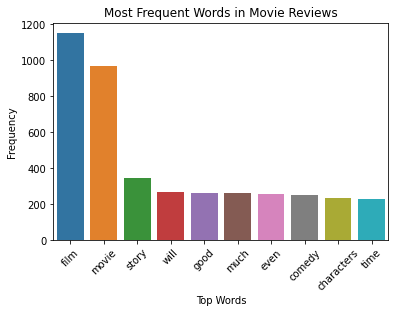

In [ ]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10), 
                          columns=['Top Words', 'Frequency'])
ax = sns.barplot(x="Top Words",y="Frequency",data=words_freq)
plt.xticks(rotation = 45);
plt.title('Most Frequent Words in Movie Reviews');

### Figure 2: Word Frequency Analysis of Movie Reviews

We can see here that there is a dominance of the usage of the words 'film' and 'movie' in our dataset. With all other terms following it still seeing a solid represenataion but not quite as prominent as the first two.

In [ ]:
def wc(data,bgcolor): # word cloud
    plt.figure(figsize=(10,10))
    wc = WordCloud(background_color=bgcolor, max_words=100, 
                 min_word_length=4, contour_width=3, 
                 contour_color='steelblue')
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

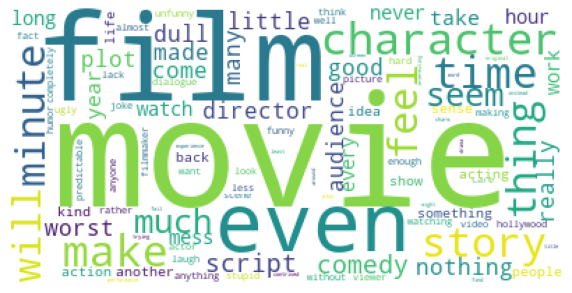

In [ ]:
wc(reviews[reviews['Sentiment'] == 0]['Phrase'].sum(), bgcolor = 'white')

### Figure 3: Wordchart of Sentiment Zero

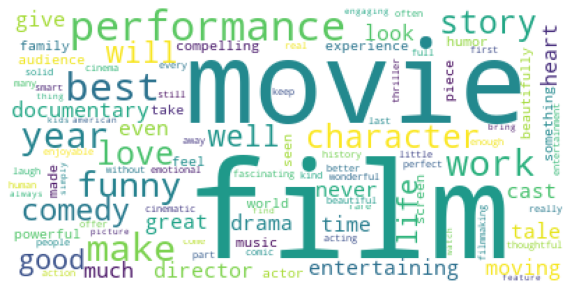

In [ ]:
wc(reviews[reviews['Sentiment'] == 4]['Phrase'].sum(), bgcolor = 'white')

### Figure 4: Wordchart of Sentiment Four

With these figures we essentially try to represent the quantity of stated terms by the size of each word in the chart. We can see in both sentiments the words 'movie,' 'film,' and 'character' are some pretty common terms stated in our review analysis. 

In [ ]:
sid_obj = SentimentIntensityAnalyzer() 
#apply the model to a string
sid_obj.polarity_scores("series escapades demonstrating adage good goose good gander occasionally amuses none amounts much story")

{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.8024}

In [ ]:
def sentiment_vader(words):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(' '.join(words))
  return sentiment_dict['compound']

In [ ]:
' '.join(reviews['Phrase'][1])

'series escapades demonstrating adage good goose good gander occasionally amuses none amounts much story'

In [ ]:
base_sent = [0,1,2,3,4]
mean_scores = []
std_scores = []
for i in base_sent:
  scores = []
  sent_statements = reviews[reviews['Sentiment'] == i]
  for j in sent_statements.index:
    scores.append(sentiment_vader(' '.join(reviews['Phrase'][j])))
  mean_scores.append(np.mean(scores))
  std_scores.append(np.std(scores))

In [ ]:
mean_scores

[0.7090002798507463,
 0.7170017727272726,
 0.6890033232628399,
 0.7432177509694098,
 0.7414063231850117]

In [ ]:
std_scores

[0.3012338238827789,
 0.295060407253626,
 0.3198559749260666,
 0.27826270601399955,
 0.2808537395933083]

In [ ]:
plot_data = pd.DataFrame({'Sentiment':base_sent, 'mean':mean_scores, 'std':std_scores})

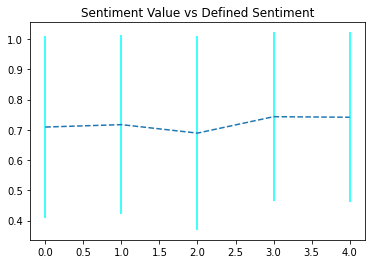

In [130]:
plt.errorbar(plot_data['Sentiment'], plot_data['mean'], yerr = plot_data['std'], ecolor = 'cyan', ls = '--');
plt.title('Sentiment Value vs Defined Sentiment');

### Figure 5: Calculated Sentiment Value Vs Rated Sentiment Value

I don't feel completely confident with this figure. Yes, I can see a slight increase in mean of our Sentiment intensity analyzer over our Rated Sentiments, but we cannot see a significant trend upward with our algorithm. 

# <mark>WFF</mark> Not quite sure what went wrong here, but the sentiment values that you calculated were not quite right. Not that far off though.